In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt('../large_files/train.csv', delimiter=',', skiprows=1, dtype=int)

def set_up_data(d):
    # shuffle the data
    np.random.shuffle(d)

    # split into X and Y (labels are first column)
    X = d[:, 1:]
    Y = d[:, 0]

    # split into train/test
    r, c = np.shape(d)
    r_90 = r // 90
    X_train, X_test = X[:-r_90], X[-r_90:]
    Y_train, Y_test = Y[:-r_90], Y[-r_90:]

    # normalize.
    # takes mean/std for each col (??)
    mu = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    
    # for all-black images (std == 0), change std to 1 to prevent /0 errors
    idx = np.where(std == 0)[0]
    assert(np.all(std[idx]) == 0)

    np.place(std, std == 0, 1)

    X_train = (X_train - mu) / std
    X_test = (X_test - mu) / std
    
    return X_train, X_test, Y_train, Y_test

def onehot_encode(y):
    N = len(y)
    min_y, max_y = np.min(y), np.max(y)
    K = (max_y - min_y) + 1

    encoded_y = np.zeros((N, K))

    for i in range(N):
        col_val = y[i]
        encoded_y[i, col_val] = 1
    
    return encoded_y

def error_rate(p, t):
    return np.mean(p != t)

2022-05-29 19:10:48.937262: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-29 19:10:49.444866: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/15
1298/1298 [==============================] - 10s 7ms/step - loss: 0.3653 - accuracy: 0.8949 - val_loss: 0.1132 - val_accuracy: 0.9528
Epoch 2/15
1298/1298 [==============================] - 9s 7ms/step - loss: 0.1108 - accuracy: 0.9683 - val_loss: 0.1245 - val_accuracy: 0.9635
Epoch 3/15
1298/1298 [==============================] - 11s 9ms/step - loss: 0.0812 - accuracy: 0.9751 - val_loss: 0.1257 - val_accuracy: 0.9549
Epoch 4/15
1298/1298 [==============================] - 12s 9ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.1752 - val_accuracy: 0.9528
Epoch 5/15
1298/1298 [==============================] - 11s 9ms/step - loss: 0.0552 - accuracy: 0.9837 - val_loss: 0.1198 - val_accuracy: 0.9657
Epoch 6/15
1298/1298 [==============================] - 11s 9ms/step - loss: 0.0503 - accuracy: 0.9870 - val_loss: 0.1155 - val_accuracy: 0.9700
Epoch 7/15
1298/1298 [==============================] - 11s 9ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.1524 - val_acc

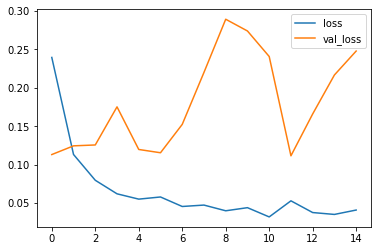

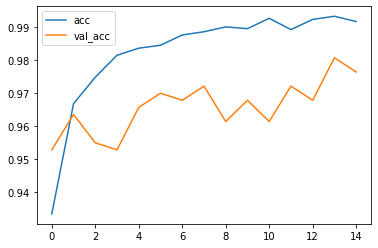

In [6]:
# get the data, same as Theano + Tensorflow examples
# no need to split now, the fit() function will do it
Xtrain, Xtest, Ytrain, Ytest = set_up_data(data)

# get shapes
N, D = Xtrain.shape
K = len(set(Ytrain))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Ytrain = onehot_encode(Ytrain)
Ytest = onehot_encode(Ytest)


# the model will be a sequence of layers
model = Sequential()


# ANN with layers [784] -> [500] -> [300] -> [10]
model.add(Dense(units=500, input_dim=D))
model.add(Activation('relu'))
model.add(Dense(units=300)) # don't need to specify input_dim
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# note: multiple ways to choose a backend
# either theano, tensorflow, or cntk
# https://keras.io/backend/


# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15, batch_size=32)
print("Returned:", r)

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
